# Final Project #
#### CSCI 4831 - Sabermetrics ####
#### Instructor: Rhonda Hoenigman ####
#### Name: Hussain Quadri ####

In [1]:
#Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pybaseball import pitching_stats_range, pitching_stats_bref
from pybaseball import statcast
%matplotlib inline


## Data & Statistics

In [2]:
# Data grabbing
# data = statcast('2017-01-01', '2018-12-31')
pitchers_2017 = pd.read_csv("Statcast_Pitching_Data_2017.csv", low_memory=False)
pitchers_2018 = pd.read_csv("Statcast_Pitching_Data_2018.csv", low_memory=False)
pitchers = pd.concat([pitchers_2017, pitchers_2018])

In [3]:
pitchers.head(5)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,2017-10-01,84.8,-1.7864,6.2820,George Kontos,645302,502004,strikeout,swinging_strike,...,8,11,8,11,11,8,8,11,Standard,Standard
1,SL,2017-10-01,85.5,-1.6885,6.2841,George Kontos,645302,502004,NaN,blocked_ball,...,8,11,8,11,11,8,8,11,Standard,Standard
2,SL,2017-10-01,85.5,-1.7503,6.3259,George Kontos,645302,502004,NaN,swinging_strike,...,8,11,8,11,11,8,8,11,Standard,Standard
3,FC,2017-10-01,89.1,-2.0060,6.2080,George Kontos,645302,502004,NaN,called_strike,...,8,11,8,11,11,8,8,11,Standard,Standard
4,FT,2017-10-01,95.3,1.8362,6.1102,Dan Runzler,457477,502130,single,hit_into_play_score,...,7,11,7,11,11,7,7,11,Standard,Standard


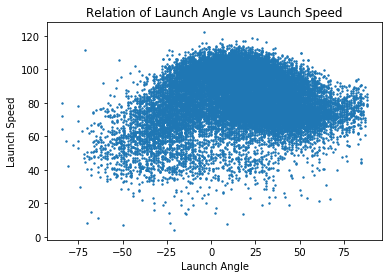

In [4]:
#Choosing variables

d = pitchers.copy()
fig, ax1 = plt.subplots()
ax1.set_xlabel("Launch Angle")
ax1.set_ylabel("Launch Speed")
ax1.set_title("Relation of Launch Angle vs Launch Speed")
ax1.scatter(d.launch_angle, d.launch_speed, s=2)


It is interesting to see here how fast a ball is thrown depending on the angle it is thrown at, the sweet spot being anywhere from 0-50 degrees, suggesting fast straight/curve balls. This makes me think that these variables have an importance in pitching quality.

In [5]:
# Filter data for just bb_type, v(x,y,z)0/a(x,y,z) effective_speed, release_spin, launch_speed, and launch_speed_angle


filtered_data = pitchers[['player_name',
                 'pitcher',
                 'bb_type',
                 'vx0', 'vy0', 'vz0',
                 'ax', 'ay', 'az',
                 'effective_speed',
                 'release_spin_rate',
                 'launch_speed',
                 'launch_speed_angle', 'woba_value', 'estimated_ba_using_speedangle']].groupby('player_name', as_index = False).mean()
filtered_data.head(10)

,player_name,pitcher,vx0,vy0,vz0,ax,ay,az,effective_speed,release_spin_rate,launch_speed,launch_speed_angle,woba_value,estimated_ba_using_speedangle
0,A.J. Cole,595918,8.130867,-127.245366,-4.900360,-6.001001,25.793299,-20.569028,87.972881,2115.190244,83.737500,3.400000,0.407843,0.365057
1,A.J. Griffin,456167,7.315173,-111.576357,-1.819155,-4.818716,20.601927,-25.342316,76.914273,2303.795455,86.082353,2.923077,0.643333,0.364923
2,A.J. Minter,621345,-6.748847,-134.618773,-4.097269,3.343426,26.998237,-20.424095,92.215869,2406.944056,83.250000,3.200000,0.382857,0.381150
3,A.J. Schugel,519263,5.378207,-122.807768,-3.974014,-11.624157,24.676650,-24.567682,83.173500,2044.642857,93.120000,4.000000,1.016667,0.626250
4,AJ Ramos,573109,5.963688,-121.128854,-1.220308,-1.237573,25.911081,-28.563750,82.043615,2402.076923,77.583333,4.000000,0.266667,0.388333
5,Aaron Brooks,605156,8.864200,-128.055554,-4.743154,-10.591100,25.731223,-24.956085,87.371538,1993.769231,77.000000,2.000000,0.466667,0.066000
6,Aaron Bummer,607481,-8.646504,-132.187202,-4.703169,8.927863,26.680237,-27.329586,90.556129,1985.405882,82.363415,2.708333,0.243421,0.280417
7,Aaron Loup,571901,-12.554004,-127.702577,-0.079262,13.436794,25.039665,-28.143413,87.304922,2231.766234,77.182609,2.818182,0.177778,0.227364
8,Aaron Nola,605400,5.059926,-125.049194,-0.536737,-3.765562,25.429751,-28.861864,86.231465,2214.200704,82.313433,2.930233,0.254795,0.299674
9,Aaron Slegers,642083,9.443827,-126.456076,-5.997472,-7.057502,26.480406,-19.760139,88.329178,2003.566667,78.576923,2.705882,0.236364,0.314000


In [6]:
#Finding variance in variables to figure out weighting system

filtered_data.var()



pitcher                          5.141534e+09
vx0                              3.270951e+01
vy0                              2.112535e+01
vz0                              3.395631e+00
ax                               5.243265e+01
ay                               4.163951e+00
az                               1.488782e+01
effective_speed                  1.110381e+01
release_spin_rate                3.348248e+04
launch_speed                     1.587547e+01
launch_speed_angle               1.482612e-01
woba_value                       1.833834e-02
estimated_ba_using_speedangle    7.789864e-03
dtype: float64

In this, we can see the most variance is in the release_spin_rate, and the least in launch_speed_angle
Weighting will be done on a scale of 1-10, with 1 going to the variable with the highest variance, and 10 going to the variable with the lowest variance

In [7]:
# Weighted Statistic = PitchingQuality = ((10*launch_speed_angle + 9*vz0 + 8*ay + 7*effective_speed + 6*az
#                                            + 5*vy0 + 4*launch_speed + 3*vx0 + 2*ax + release_spin_rate)/(55*100))

filtered_data['Pitching_Quality'] = ((10*filtered_data['launch_speed_angle'] + 9*filtered_data['vz0'] + 8*filtered_data['ay'] 
                                      + 7*filtered_data['effective_speed'] + 6*filtered_data['az'] + 5*filtered_data['vy0'] 
                                      + 4*filtered_data['launch_speed'] + 3*filtered_data['vx0'] + 2*filtered_data['ax'] 
                                      + filtered_data['release_spin_rate'])/(27.5*100))

Updated_Data = filtered_data.sort_values(by=['Pitching_Quality'], ascending=False)
Updated_Data.head()

,player_name,pitcher,vx0,vy0,vz0,ax,ay,az,effective_speed,release_spin_rate,launch_speed,launch_speed_angle,woba_value,estimated_ba_using_speedangle,Pitching_Quality
517,Nik Turley,543867,-6.823205,-129.752862,-3.777267,3.192990,26.276162,-23.091043,89.361952,2838.095238,86.980000,3.666667,0.500000,0.400000,1.172013
526,Pat Venditte,519381,1.465767,-115.887578,1.920261,2.393361,22.111161,-26.632322,79.497722,2794.000000,81.880000,2.400000,0.116667,0.142600,1.151319
542,Ray Black,605143,6.922742,-135.540792,-3.794398,-0.409944,29.114568,-20.203228,92.817480,2748.979592,72.127778,2.625000,0.330769,0.383875,1.139365
606,Shawn Armstrong,542888,7.708582,-131.856105,-4.161079,-1.140330,27.602556,-20.844454,90.420404,2722.176471,77.050000,3.250000,0.446875,0.306875,1.132977
575,Ryan Pressly,519151,1.466149,-131.847819,-5.002214,2.872953,28.159767,-23.759620,89.850463,2741.989474,80.004348,2.857143,0.283333,0.247714,1.130232


# Comparisons #

Now that we have gathered our data using our updated heuristic, I would like to plot this data and compare it against other more used statistics such as wOBA and Estimated Batting Average.

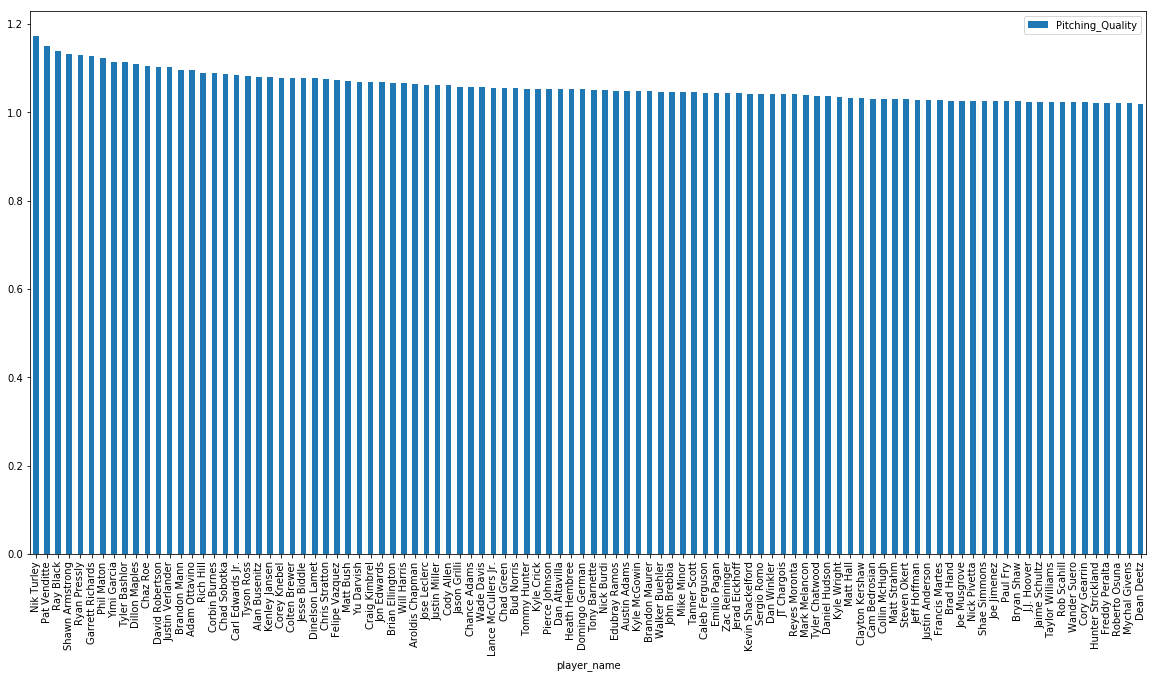

In [8]:
Updated_Data.head(100).plot.bar(x='player_name', y='Pitching_Quality', figsize=(20, 10))

The plot above shows a sample of the top 100 players according to this statistic. Now let's compare it to the top 100 pitchers using wOBA as an estimate.

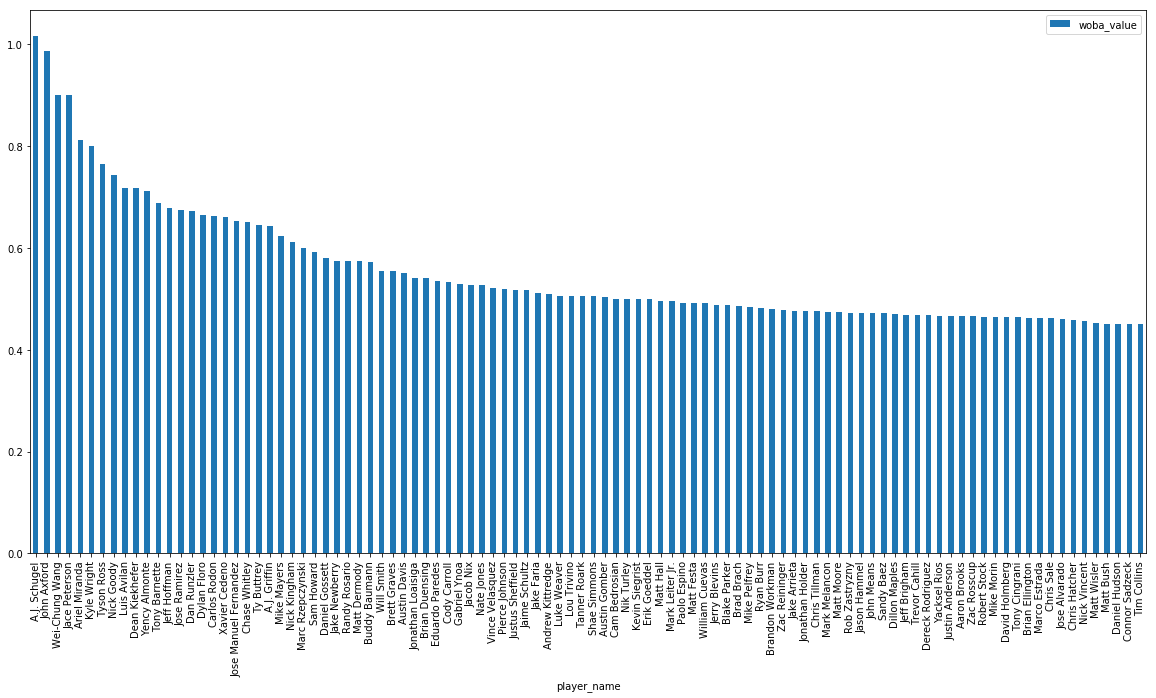

In [9]:
filtered_data.sort_values(by=['woba_value'], ascending=False).head(100).plot.bar(x='player_name', y='woba_value', figsize=(20, 10))

The wOBA statistic shows the offensive contributions of a player on a plate appearance, but I would like to see how offensiveness relates to the pitching quality.

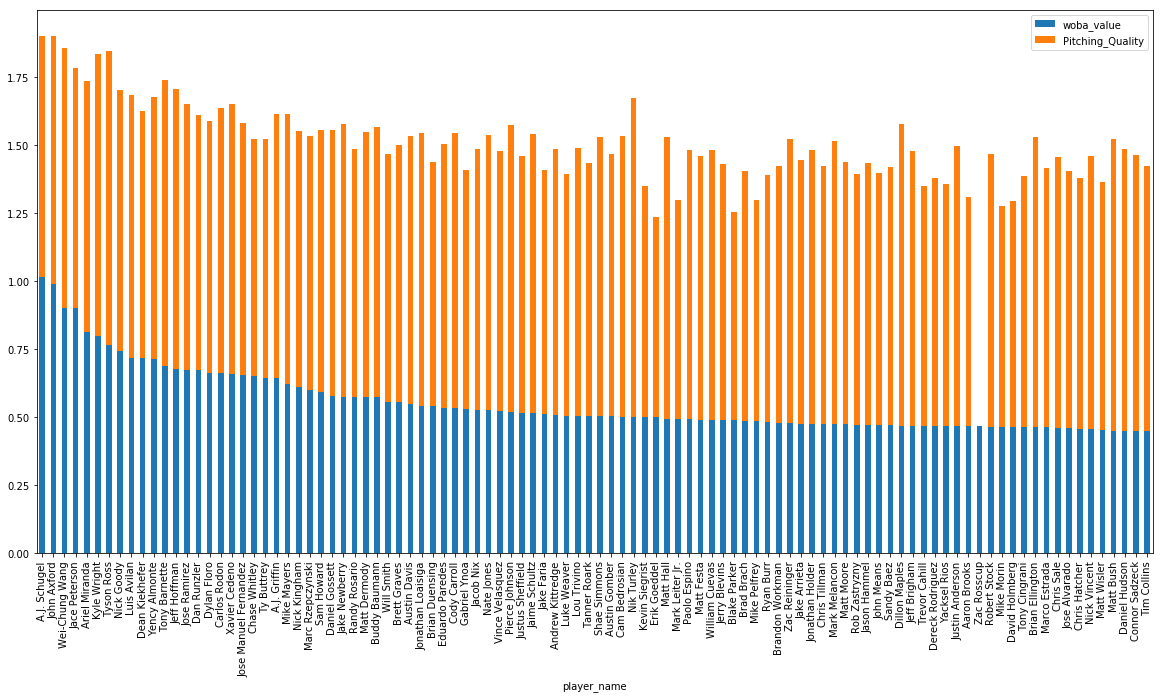

In [10]:
filtered_data.sort_values(by=['woba_value'], ascending=False).head(100).plot.bar(x='player_name', y=['woba_value', 'Pitching_Quality'], figsize=(20, 10), stacked=True)

Generally, it seems as if wOBA has a slight correlation to pitching quality, i.e the figure above is showing that a generally high wOBA score most likely relates to a high pitch quality.

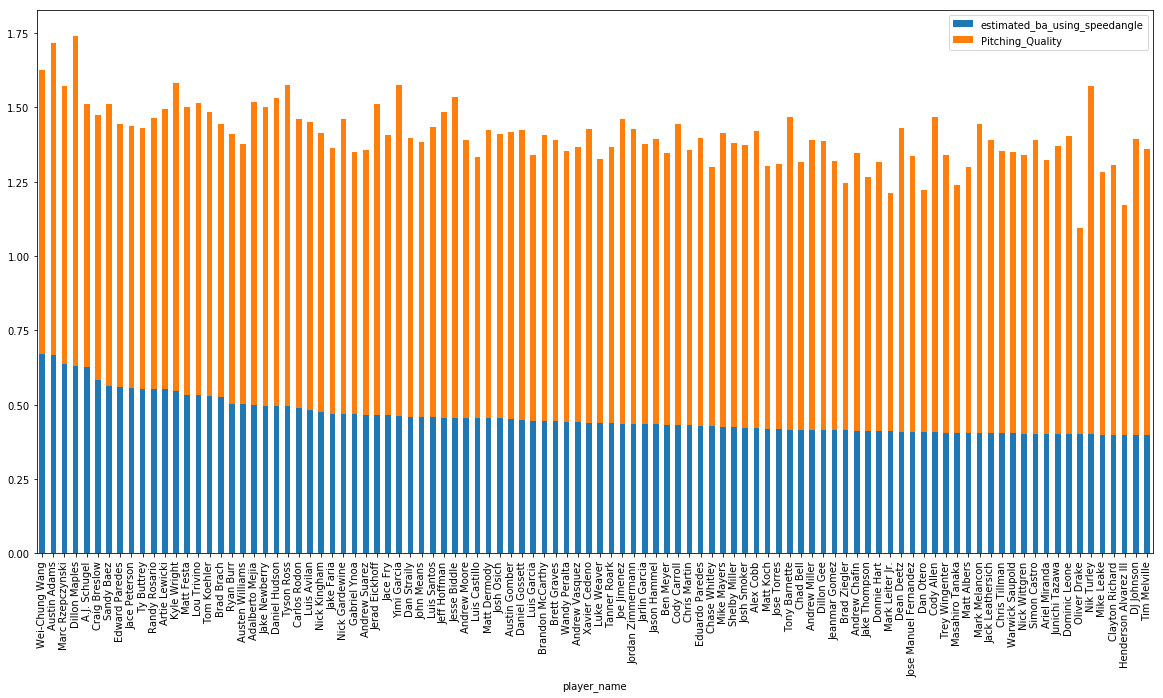

In [11]:
filtered_data.sort_values(by=['estimated_ba_using_speedangle'], ascending=False).head(100).plot.bar(x='player_name', y=['estimated_ba_using_speedangle', 'Pitching_Quality'], figsize=(20, 10), stacked=True)

Given our data, let's see how well our new statistic matches the others by pulling the top 20 players using each statistic:
#### wOBA

In [12]:
filtered_data.sort_values(by=['woba_value'], ascending=False).head(20)

,player_name,pitcher,vx0,vy0,vz0,ax,ay,az,effective_speed,release_spin_rate,launch_speed,launch_speed_angle,woba_value,estimated_ba_using_speedangle,Pitching_Quality
3,A.J. Schugel,519263,5.378207,-122.807768,-3.974014,-11.624157,24.676650,-24.567682,83.173500,2044.642857,93.120000,4.000000,1.016667,0.626250,0.884518
358,John Axford,446099,4.244777,-128.079485,-4.452246,-3.225554,27.918562,-26.666115,87.756154,2107.846154,91.000000,3.500000,0.987500,0.351750,0.912839
680,Wei-Chung Wang,623913,-4.910800,-124.289633,-3.861900,-2.103233,22.782267,-27.066400,84.532000,2303.666667,86.766667,4.000000,0.900000,0.670000,0.955336
292,Jace Peterson,607054,4.129390,-121.929047,-3.797967,-6.222763,23.323167,-20.446857,82.743567,2039.633333,86.377778,3.857143,0.900000,0.556000,0.881069
52,Ariel Miranda,664641,-5.260104,-126.935363,-6.635067,12.767263,26.554444,-14.611722,86.150889,2137.185185,79.188889,3.833333,0.812500,0.402333,0.921984
432,Kyle Wright,657140,5.256665,-132.430271,-5.225353,-2.172435,27.116476,-24.595618,91.046059,2434.882353,88.200000,4.666667,0.800000,0.547667,1.033918
667,Tyson Ross,475115,5.988619,-130.961241,-6.892419,-2.048252,25.387022,-24.132422,89.149889,2607.153846,87.837500,3.600000,0.764286,0.494600,1.081413
510,Nick Goody,580792,4.922048,-128.958014,-3.514362,-4.513203,25.716659,-16.855190,89.090172,2208.884615,83.600000,3.166667,0.742857,0.299833,0.957275
440,Luis Avilan,501593,-1.529308,-119.007654,-3.328831,6.253200,20.895638,-28.633023,80.927692,2302.538462,93.766667,3.666667,0.716667,0.483333,0.966928
201,Dean Kiekhefer,518883,-7.078665,-114.668347,-0.954676,2.596682,20.836776,-29.995976,78.137235,2246.235294,72.075000,2.666667,0.716667,0.258000,0.907965


#### Estimated BA

In [13]:
filtered_data.sort_values(by=['estimated_ba_using_speedangle'], ascending=False).head(20)

,player_name,pitcher,vx0,vy0,vz0,ax,ay,az,effective_speed,release_spin_rate,launch_speed,launch_speed_angle,woba_value,estimated_ba_using_speedangle,Pitching_Quality
680,Wei-Chung Wang,623913,-4.910800,-124.289633,-3.861900,-2.103233,22.782267,-27.066400,84.532000,2303.666667,86.766667,4.000000,0.900000,0.670000,0.955336
58,Austin Adams,613534,7.509855,-134.368160,-4.334730,1.462372,28.036257,-21.732381,91.925532,2536.476190,64.350000,4.000000,0.300000,0.667000,1.049401
453,Marc Rzepczynski,519240,-5.465708,-127.315600,-3.193767,6.476133,24.329742,-31.968958,86.693750,2279.750000,79.266667,3.000000,0.600000,0.637000,0.933720
210,Dillon Maples,596027,4.170490,-132.073760,-3.648713,3.796881,27.190150,-29.092131,90.230667,2664.375000,85.570000,4.200000,0.469231,0.631600,1.109140
3,A.J. Schugel,519263,5.378207,-122.807768,-3.974014,-11.624157,24.676650,-24.567682,83.173500,2044.642857,93.120000,4.000000,1.016667,0.626250,0.884518
169,Craig Breslow,444520,-8.765139,-123.790200,-2.117328,12.257400,24.658194,-22.269867,83.762500,2032.388889,90.180000,4.666667,0.430000,0.583333,0.890899
589,Sandy Baez,622783,7.433634,-133.825107,-5.850964,-9.810530,28.766664,-17.642481,90.986313,2189.800000,84.031250,4.000000,0.471429,0.564125,0.948365
234,Edward Paredes,487675,-7.268470,-122.329009,-1.095961,4.312596,21.413991,-24.276265,83.740000,2115.695652,75.150000,4.000000,0.225000,0.559500,0.884888
292,Jace Peterson,607054,4.129390,-121.929047,-3.797967,-6.222763,23.323167,-20.446857,82.743567,2039.633333,86.377778,3.857143,0.900000,0.556000,0.881069
655,Ty Buttrey,621142,4.589953,-131.711518,-5.655797,-12.687229,28.482591,-21.401747,89.505676,2023.588235,87.040000,3.625000,0.645000,0.553625,0.877427


And now:
#### Pitching Quality

In [14]:
filtered_data.sort_values(by=['Pitching_Quality'], ascending=False).head(20)

,player_name,pitcher,vx0,vy0,vz0,ax,ay,az,effective_speed,release_spin_rate,launch_speed,launch_speed_angle,woba_value,estimated_ba_using_speedangle,Pitching_Quality
517,Nik Turley,543867,-6.823205,-129.752862,-3.777267,3.192990,26.276162,-23.091043,89.361952,2838.095238,86.980000,3.666667,0.500000,0.400000,1.172013
526,Pat Venditte,519381,1.465767,-115.887578,1.920261,2.393361,22.111161,-26.632322,79.497722,2794.000000,81.880000,2.400000,0.116667,0.142600,1.151319
542,Ray Black,605143,6.922742,-135.540792,-3.794398,-0.409944,29.114568,-20.203228,92.817480,2748.979592,72.127778,2.625000,0.330769,0.383875,1.139365
606,Shawn Armstrong,542888,7.708582,-131.856105,-4.161079,-1.140330,27.602556,-20.844454,90.420404,2722.176471,77.050000,3.250000,0.446875,0.306875,1.132977
575,Ryan Pressly,519151,1.466149,-131.847819,-5.002214,2.872953,28.159767,-23.759620,89.850463,2741.989474,80.004348,2.857143,0.283333,0.247714,1.130232
259,Garrett Richards,572070,5.544795,-133.809761,-4.402649,-3.453745,28.273967,-27.164517,91.528934,2763.057851,76.300000,2.764706,0.241071,0.330529,1.127588
533,Phil Maton,664208,2.180922,-127.831611,-1.298925,1.327744,26.119330,-25.624069,88.500551,2690.829545,83.305000,3.363636,0.316667,0.365091,1.123909
691,Yimi Garcia,554340,7.548971,-131.198636,-0.776636,-1.380714,26.470636,-25.085550,89.477714,2667.500000,80.375000,3.000000,0.416667,0.460500,1.113999
657,Tyler Bashlor,641341,4.235161,-135.142709,-3.494510,-8.232219,31.177197,-17.901766,92.436740,2608.961039,84.678261,3.625000,0.353571,0.327250,1.113478
210,Dillon Maples,596027,4.170490,-132.073760,-3.648713,3.796881,27.190150,-29.092131,90.230667,2664.375000,85.570000,4.200000,0.469231,0.631600,1.109140


Here, we can see a small overlap in using both statistics. While BA and wOBA look at the offensive possibility of the pitches, the quality of the pitch is not considered. Comparing our results, we can see that Dillon Maples appears in the top x of Pitching Quality and estimated BA, Tyson Ross appears in the top 20 of Pitching Quality, as well as the top 10 wOBA.

I believe this can conculde a general importance of evaluating pitching quality as a measure of the possible offensiveness of a pitcher. 
